# **Clustering o Agrupamiento de Datos**

Muchas veces recibimos datos en bruto y no tenemos ni idea de posibles estructuras que podrían ocultarse tras esa gran cantidad de datos. Las técnicas de **Clustering** permiten segmentar los datos en clusters en base a ciertas características. A diferencia de la Reducción de Dimensionalidad, aquí no estamos intentando eliminar redundancia eliminando o comprimiendo la información de las columnas, sino que simplemente agrupamos cada instancia en conjuntos que compartan una similaridad.

# **Definiendo los clústers**

Los clústers son agrupaciones de puntos en una espacio de $n$ dimensiones. Si estamos trabajando con un DataFrame, cada fial es un vector, con tantas dimensiones como columnas. El concepto de **centroide** (denotado como $\mu$) hace referencia a la media aritmética de las posiciones de los puntos pertenecientes a un clúster. La fórmula exacta es:

$$\mu =(\frac{1}{n}\sum_{i=1}^{n}x_{1} + \frac{1}{n}\sum_{i=1}^{n}x_{2} \cdots \frac{1}{n}\sum_{i=1}^{n}x_{d})$$


 <div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1UuXHzUv0freSafhKMB7gX0TjP5u1Kr8m" width="300">


En otras palabras, el centroide es un vector de $d$ dimensiones, las mismas que los $n$ puntos del cúster, y cada una de sus dimensiones es la media aritmética de los valores de los puntos en sus respectivas dimensiones. Al igual que la media de una distribución, el centroide ofrece una idea general de la posición del clúster en su conjunto. El objetivo de muchos de los algoritmos de clusterización es precisamente encontrar el centroide adecuado.

Si cada clúster tiene su "media" también tendrá una medida de la dispersión de los puntos dentro del clúster. La llamada **varianza intra-clúster** $S$ mide cómo de apiñados están los datos calculando la media de las distancias entre cada punto y el clúster. Existen varias medidas de distancia entre vectores, siendo la más usual la distancia euclidiana: Aquí la fórmula general de la varianza.

$$\S =\frac{1}{n}\sum_{i=1}^{n} d(x_{i} - \mu)^{2}$$

 <div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1A4YZuywAvCQ_yYd2hVO6RfyhUdd67yhg" width="300">

En la imagen de arriba podemos ver dos clústers distintos, con un mismo centroide. El clúster más interno tiene evidentemente una varianza mucho menor que el más externo. Normalmente los algoritmos de clusterización intentarán minimizar la varianza, lo que repercute en clústers más densos.

Otra métrica a tener en cuenta es la **inercia**, que podemos conocer cuando tenemos más de dos clústers. Simplemente es la suma de las varianzas de cada clúster. Cuanto mayor es la inercia, mayor es la dispersión general de los clústers.

Otros índices que podemos utilizar son las Matrices de Dispersión, tanto dentro de un clúster como entre clústers. La primera mide la varianza para $k$ clústers.

$$W_{k} = \sum_{j=1}^{k}\sum_{i=1}^{n}(x_{ij} - \mu_{j})(x_{ij} - \mu_{j})^{T}$$

Como vemos, esta matriz recoge información de la totalidad de clústers realizados. También existe la Matriz de Dispersión inter-clúster que mide la dispersión de los centroides de cada clúster, respecto a un centroide global $\mu'$.

$$B_{k} = \sum_{j=1}^{k}(\mu_{j} - \mu')(\mu_{j} - \mu')^{T}$$

# **Evaluación del número de clústers**

Muchos algoritmos de clusterización exigen indicar manualmente el número de clústers. ¿Cómo podemos orientarnos en relación al número óptimo de clústers? Normalmente la opción es probar con varias agrupaciones y métodos y utilizar pruebas que permiten darnos una idea de la calidad de los clústers logrados. Muchas de ellas operan se calculan a partir de los centroides de cada clúster. He aquí una selección de algunas de ellas:

- **Silhouette Score**: se trata de una métrica a nivel de puntos de datos individuales. Un valor de silueta cercano a 1 indica que los puntos están bien agrupados, un valor cercano a 0 indica que los puntos están en el borde entre dos clústeres y un valor negativo indica que los puntos pueden estar mal asignados a clústeres incorrectos.
- **Índice de Calinski-Harabasz**: evalúa la calidad del clustering midiendo la relación entre la dispersión intra-cluster e inter-cluster. Se calcula como la razón entre la varianza entre los clústeres (la Matriz de Dispersión inter-clúster) y la varianza dentro de los clústeres (la Matriz de Dispersión intra-clúster). Un valor más alto del índice de Calinski-Harabasz indica una mejor separación entre los clústeres y, por lo tanto, una mejor calidad de clustering.
- **Índice de Davies-Bouldin**: esta métrica evalúa la dispersión dentro de los clústeres y la distancia entre los clústeres. Para cada par de clústers se suman sus varianzas internas y se divide por la distancia entre los centroides de ambos clústers. Valores más bajos indican mejores clusters. Un índice DBI más bajo sugiere que los clústeres son más compactos y están mejor separados unos de otros.
- **Índice de Dunn**: este índice se centra en maximizar la distancia entre los clústeres y minimizar la dispersión dentro de los clústeres. Valores más altos indican mejores clusters.

Lo ideal sería evaluar todas estas pruebas para hacernos una ídea de la estructura de datos que tenemos delante.

Para pruebas específicas que nos permitan tener una idea del número óptimo de clústers tenemos el llamado **Elbow Method** (Método del Codo). Se trata de una técnica visual utilizada para encontrar el número óptimo de clusters.

In [ ]:
!pip install --q validclust

# **Análisis del DataFrame**

In [ ]:
!pip install --q validclust

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns

url='https://drive.google.com/file/d/1tj9_BvgwCtOwI55LhwLQkHX6a7xejvQN/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

data.head(6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0


In [ ]:
data.shape

(10000, 6)

In [ ]:
# VALORES FALTANTES
if data.isnull().values.any():
    data.dropna(inplace=True)
    print("Filas tras limpiar valores faltantes:",data.shape[0])

In [ ]:
num_columns = data.select_dtypes(include="number").columns.tolist()
print(num_columns)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [ ]:
print(data["Extracurricular Activities"].unique())

['Yes' 'No']


In [ ]:
dict_extra = {"No": 0, "Yes": 1}
data["Extracurricular Activities"] = data["Extracurricular Activities"].map(dict_extra)

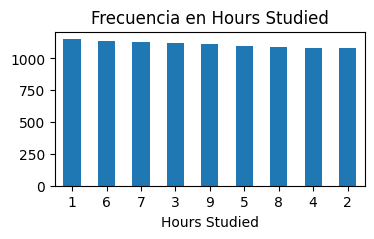

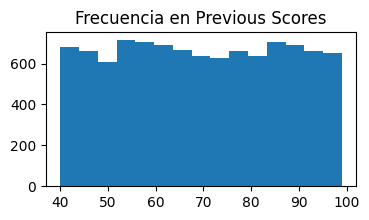

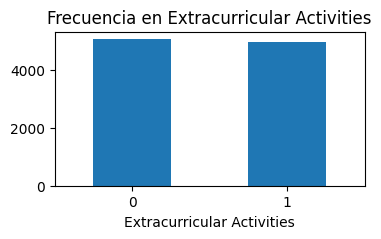

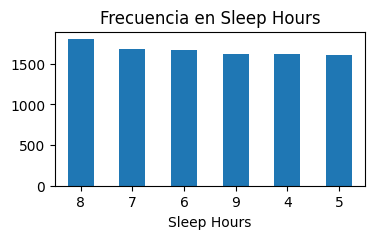

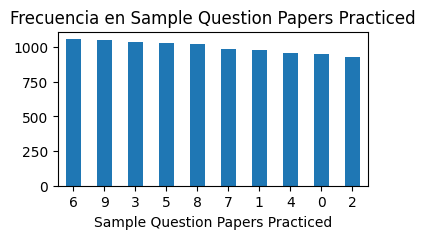

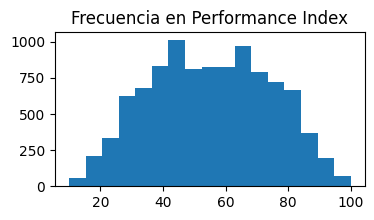

In [ ]:
for column in data.columns:
  if data[column].dtype == "object" or len(data[column].unique())<=10:
    plt.figure(figsize=(4, 2))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia en {column}')
    plt.xticks(rotation=0)
    plt.show()
  else:
    plt.figure(figsize=(4, 2))
    plt.hist(data[column], bins=len(column))
    plt.title(f'Frecuencia en {column}')
    plt.show()

# **Rescalado de datos**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data) # Realizar estandarización
#standardized_data = data.copy() # NO realizar estandarización

# **Evaluación de clústers**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#EVALUACIÓN DE CLUSTERS
def cluster_indexes(df, n_max_clust, methods):
    """
    Esta función devuelve los valores más altos de cada índice para cada método utilizado, probando todos los número de clusters desde dos
    hasta un límite indicado.
    Parámetros:
      -df: DataFrame a estudiar.
      -n_max_clust: número máximo de cluster a testear
      -methods: métodos de clustering a testear. Los valores permitidos son "kmeans" y "hierarchical"
    Devuelve:
      -results: una tupla con un valor para cada método. En cada método devuelve los índices con mayor puntuación, indicando el número de cluster
      en el que se dio ese valor.

    """
    import pprint
    kmeans_dict = {}
    agglm_dict = {}

    kmeans_max_values = {
        "Índice de Silueta": (0, float('-inf')),
        "Índice de Calinski-Harabasz": (0, float('-inf')),
        "Índice de Davis Bouldin": (0, float('inf'))
    }

    agglm_max_values = {
        "Índice de Silueta": (0, float('-inf')),
        "Índice de Calinski-Harabasz": (0, float('-inf')),
        "Índice de Davis Bouldin": (0, float('inf'))
    }

    for n_cluster in range(2, n_max_clust + 1):
        if "kmeans" in methods:
            kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0, n_init="auto").fit(df)
            kmeans_labels = kmeans.labels_
            silhouette_avg = silhouette_score(df, kmeans_labels)
            ch_score = calinski_harabasz_score(df, kmeans_labels)
            db_score = davies_bouldin_score(df, kmeans_labels)

            kmeans_dict[n_cluster] = {
                "K-means. Índice de Silueta": silhouette_avg,
                "K-means. Índice de Calinski-Harabasz": ch_score,
                "K-means. Índice de Davis Bouldin": db_score
            }

            if silhouette_avg > kmeans_max_values["Índice de Silueta"][1]:
                kmeans_max_values["Índice de Silueta"] = (n_cluster, silhouette_avg)
            if ch_score > kmeans_max_values["Índice de Calinski-Harabasz"][1]:
                kmeans_max_values["Índice de Calinski-Harabasz"] = (n_cluster, ch_score)
            if db_score < kmeans_max_values["Índice de Davis Bouldin"][1]:
                kmeans_max_values["Índice de Davis Bouldin"] = (n_cluster, db_score)

        if "hierarchical" in methods:
            agglm = AgglomerativeClustering(n_clusters=n_cluster).fit(df)
            agglm_labels = agglm.labels_
            silhouette_avg = silhouette_score(df, agglm_labels)
            ch_score = calinski_harabasz_score(df, agglm_labels)
            db_score = davies_bouldin_score(df, agglm_labels)

            agglm_dict[n_cluster] = {
                "Jerárquico. Índice de Silueta": silhouette_avg,
                "Jerárquico. Índice de Calinski-Harabasz": ch_score,
                "Jerárquico. Índice de Davis Bouldin": db_score
            }

            if silhouette_avg > agglm_max_values["Índice de Silueta"][1]:
                agglm_max_values["Índice de Silueta"] = (n_cluster, silhouette_avg)
            if ch_score > agglm_max_values["Índice de Calinski-Harabasz"][1]:
                agglm_max_values["Índice de Calinski-Harabasz"] = (n_cluster, ch_score)
            if db_score < agglm_max_values["Índice de Davis Bouldin"][1]:
                agglm_max_values["Índice de Davis Bouldin"] = (n_cluster, db_score)

    results = {
        "kmeans": kmeans_max_values,
        "hierarchical": agglm_max_values
    }

    pprint.pprint(results)


results = cluster_indexes(standardized_data, 4, ["kmeans", "hierarchical"])


{'hierarchical': {'Índice de Calinski-Harabasz': (2, 2512.2986386080597),
                  'Índice de Davis Bouldin': (3, 1.8203117409673337),
                  'Índice de Silueta': (2, 0.17946066256356497)},
 'kmeans': {'Índice de Calinski-Harabasz': (2, 3156.630268439548),
            'Índice de Davis Bouldin': (2, 1.7497923752588989),
            'Índice de Silueta': (2, 0.2148902438667429)}}


                                   2            3            4            5  \
method       index                                                            
kmeans       silhouette     0.214891     0.187993     0.193329     0.181943   
             calinski    3156.634325  2477.430003  2287.798512  2022.974573   
             davies         1.749799     1.757981     1.825801     1.718670   
             dunn           0.008396     0.008642     0.009924     0.009037   
hierarchical silhouette     0.179461     0.155587     0.166472     0.150089   
             calinski    2512.298639  2036.612528  1964.528301  1704.192153   
             davies         1.955809     1.820312     1.859818     1.871669   
             dunn           0.028491     0.029530     0.030072     0.030956   

                                   6  
method       index                    
kmeans       silhouette     0.184188  
             calinski    1876.185348  
             davies         1.652216  
             d

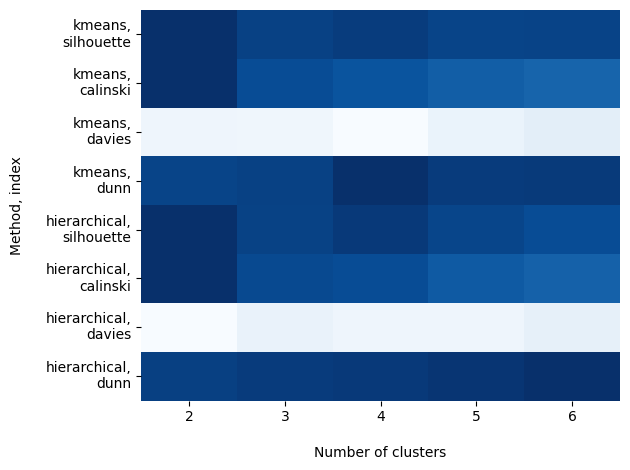

In [ ]:
# EVALUACIÓN DEL NÚMERO DE CLÚSTERS CON VALIDCLUST
# Utilizamos la biblioteca de validclust

from validclust import ValidClust

vclust = ValidClust(
    k=list(range(2, 7)), # Aquí indicamos el rango de grupos a comprobar
    methods=['kmeans','hierarchical'] # Indicamos la estrategia de clusterización a evaluar.
)
cvi_vals = vclust.fit_predict(standardized_data)
print(cvi_vals)
vclust.plot()

# **K-means**

El algoritmo de clusterización más sencillo y conocido es sin duda **K-means**. Aunque limitado en ciertos contextos, es una buena manera de iniciarse en las técnicas de agrupamientos de datos. Inicialmente es necesario indicarle manualmente un número $k$ de grupos o clústers que deseamos. Esta es precisamente una de sus limitaciones, pues el resultado depende de esta decisión inicial que el propio algoritmo es incapaz de hacer. Podemos optar por las técnicas de evaluación antes mencionadas para hacernos una idea del número de clúster óptimo.

Para cada grupo indicado $k$ el algoritmo genera aleatoriamente $k$ dos puntos. Calcula la distancia de los datos a dichos puntos y agrupa aquellos con la distancia más baja. El siguiente paso es calcular la media de cada uno de los datos asignados al grupo, es decir, el centroide. De nuevo otra vez se recalculan las distancias para la nueva asignación de datos a los grupos y se calcula un nuevo centroide, así iterativamente, de manera que los centroides van desplazándose hacia sus posiciones óptimas. Una vez que los centroides no varían significativamente de su posición, el algoritmo da por terminada la iteración. Es posible ajustar el número de iteraciones o incluso el criterio de tolerancia, aunque evidentemente, más iteraciones implican mayor tiempo de cálculo.


<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=10C5wNAcnXIEiKNraVwE5INaxt7HsgHvh" width="400">

Elbow Method utiliza la inercia para ayudar a determinar el número óptimo de clusters para un conjunto de datos. Al graficar la inercia en función del número de clusters, se busca el "codo" de la gráfica, que es el punto donde la disminución de la inercia se vuelve menos pronunciada. Este punto sugiere un buen equilibrio entre la compactación y la generalización de los clusters.

La simplicidad y celeridad de este algoritmo lo convierte en el más conocido de todos. Sin embargo arrastra una serie de limitaciones muy importantes que impiden sus uso en todos los casos. La primera es la ya mencionada de elección inicial de un número de clústers. La segunda es la inicialización aleatoria de los centroides. Diferentes asignaciones pueden dar lugar a resultados muy diferentes. Al operar con distancias, k-means se ve limitado a columnas numéricas. Por último, K-means no opera óptimamente con estructuras de datos complejas que se alejan de la esfericidad, como las que vemos en la imagen.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1OT82k64zPVqcvxPBTG5iRLknKKXb9bcD" width="600">

Al operar con distancias, es altísimamente recomendable escalar las columnas a un mismo rango de valores.

Algunas formas de optimizar K-Means estan relacionadas precisamente con estas limitaciones. Por ejemplo, la inicialización, *K-Means++* permite una selección de centroides para una mejor convergencia. Se selecciona el primer centroide aleatoriamente y el resto a medida de la distancia respecto al primero.

K-Means explicado: https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means

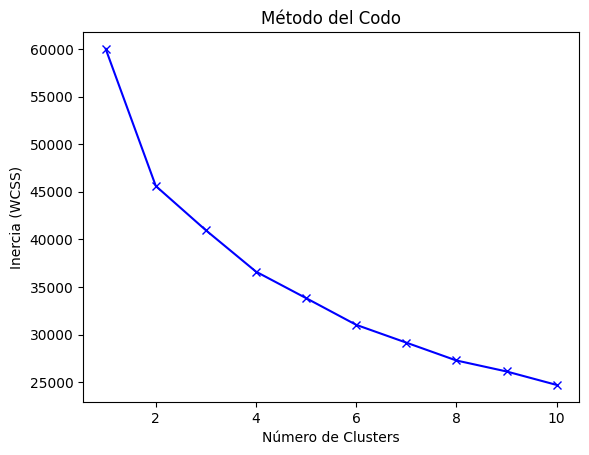

In [ ]:
# ELBOW METHOD
K = range(1, 11)
# Lista para almacenar la inercia para cada K
inertia = []

# Aquí simplemente aplicamos k-means para número de clusters.
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(standardized_data)
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (WCSS)')
plt.title('Método del Codo')
plt.show()

In [ ]:
# CLUSTERIZACIÓN CON K-MEANS
n_clusters = 2

# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', random_state=42) # Definimos un objeto KMeans.
kmeans.fit(standardized_data) # Generacmos la clusterización.

# Creamos un nuevo DataFrame y guardamos en el las asignaciones a los clústers.
data_kmeans = pd.DataFrame(data).copy()
data_kmeans["n_cluster"] = kmeans.labels_ # kmeans.labels_ guarda las asignaciones de clusters.
data_kmeans.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,n_cluster
0,7,99,1,9,1,91.0,0
1,4,82,0,4,2,65.0,0
2,8,51,1,7,2,45.0,1
3,5,52,1,5,2,36.0,1
4,7,75,0,8,5,66.0,0


In [ ]:
# OBTENCIÓN DE CENTROIDES
centroids = kmeans.cluster_centers_
print("Centroides:")
print(centroids)

Centroides:
[[ 0.14558957  0.84833321  0.00297492  0.0260377   0.03348546  0.8407882 ]
 [-0.14460292 -0.84258409 -0.00295475 -0.02586124 -0.03325853 -0.83509021]]


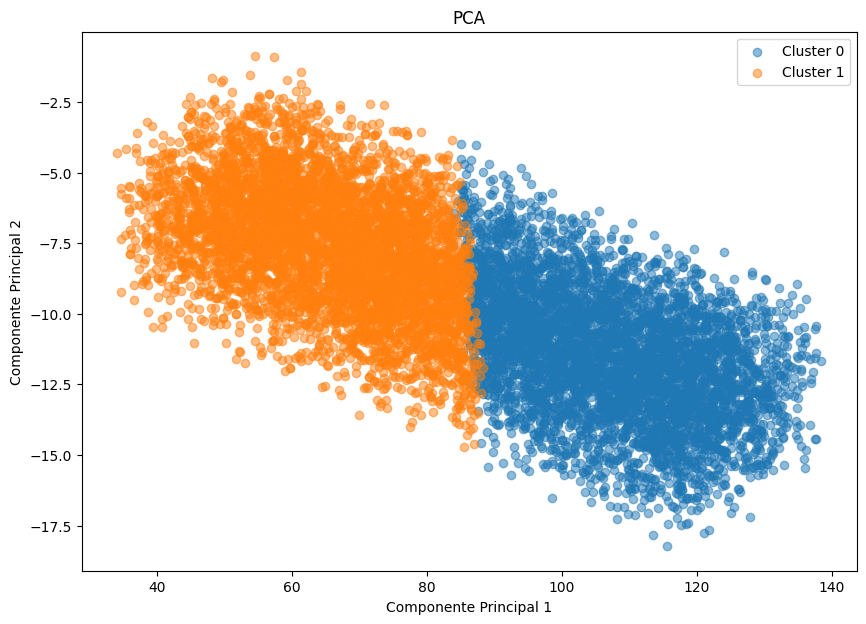

In [ ]:
from sklearn.decomposition import PCA

# APLICAR PCA PARA VISUALIZACIÓN
n_components = 2
pca = PCA(n_components=2)
pca.fit(standardized_data)
data_pca = pca.transform(data_kmeans.iloc[:, :-1]) # Aplicar PCA al DataFrame excluyendo la última, que es la que guarda las asignaciones a clústers.
data_pca = pd.DataFrame(data_pca, columns=["PC1","PC2"]) # Generamos
data_pca["n_cluster"] = kmeans.labels_

plt.figure(figsize=(10, 7))
for cluster in data_pca['n_cluster'].unique():
    cluster_data = data_pca[data_pca['n_cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.legend()
plt.show()

In [ ]:
# INTERPRETACIÓN DE LOS CLUSTERS
# Dividimos cada cluster en dos DataFrames
data_kmeans_0 = data_kmeans[data_kmeans["n_cluster"]==0]
data_kmeans_1 = data_kmeans[data_kmeans["n_cluster"]==1]

In [ ]:
data_kmeans_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,4986.0,5.367429,2.549210,1.0,3.0,6.0,8.0,9.0
Previous Scores,4986.0,84.153630,9.294387,60.0,77.0,85.0,92.0,99.0
Extracurricular Activities,4986.0,0.495788,0.500032,0.0,0.0,0.0,1.0,1.0
Sleep Hours,4986.0,6.575612,1.702438,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,4986.0,4.679101,2.851122,0.0,2.0,5.0,7.0,9.0
Performance Index,4986.0,71.365423,10.478102,50.0,63.0,71.0,79.0,100.0
n_cluster,4986.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_kmeans_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,5014.0,4.620463,2.575365,1.0,2.0,4.0,7.0,9.0
Previous Scores,5014.0,54.819904,9.215859,40.0,47.0,54.0,62.0,79.0
Extracurricular Activities,5014.0,0.493817,0.500012,0.0,0.0,0.0,1.0,1.0
Sleep Hours,5014.0,6.485840,1.688280,4.0,5.0,6.0,8.0,9.0
Sample Question Papers Practiced,5014.0,4.488034,2.880518,0.0,2.0,4.0,7.0,9.0
Performance Index,5014.0,39.174312,10.502055,10.0,32.0,40.0,48.0,60.0
n_cluster,5014.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# **Clustering jerárquicos**

La clusterización jerárquica implica la formación de clusters anidados. Existen dos estrategias principales. Podemos comenzar asignando un clúster a cada uno de los datos y vamos progresivamente fusionando agrupaciones por cercanía. Este método se conoce como aglomerativo. Los clusters cada vez acogen más y más datos hasta que o bien abarcan todo el dataset o bien se cumplen ciertos criterios de parada. En un segundo método, llamado **divisivo**, el proceso es inverso: todo el conjunto de datos se considera inicialmente un único clúster para luego dividirse poco a poco.

Comencemos con los **Clusterings Aglomerativos**:

¿Cuál sería el criterio de cercanía para fusionar agrupaciones? Para cada cluster, el algoritmo aglomerativo calcula una métrica de distancia y evalúa el cluster que más se acerque. Esto son los principales métodos de enlace o *linkage*:
- *Complete linkage*: minimiza la distancia entre los puntos más alejados entre clústers.
- *Single Linkage*: busca el cluster con la menor distancia entre los puntos más cercanos.
- *Average Linkage*: minimiza la distancia entre la media de las distancias entre los puntos de dos clusters.
- *Ward*: en cada paso, busca combinar los dos clústeres cuya fusión resulte en un menor incremento en la suma total de las diferencias cuadradas dentro de los clústeres. Es realmente similar a la aproximación de K-means porque esas distancias se calculan entre cada punto y los centroides. Suele ser la estrategia más efectiva cuando desconocemos otro tipo de parámetros del dataset.

 <div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1pPEXDGaqwLLqfE4glAy-kPCqk1-fVqej" width="1000">

Otra métrica a tener en cuenta es la *conectividad*. Esta no permite añadir restricciones para que solo puedan añadirse datos adyacentes. La conectividad nos permite tratar con estructuras de datos complejas. Las restricciones de conectividad se imponen a través de una matriz de conectividad.

El clustering aglomerativo es adecuado para conjuntos de datos no demasiado grandes debido a su complejidad computacional. Especialmente pesado es el tipo de enlace Ward.

Pasemos a **Clusterings Divisivos**:

En el clustering jerárquico divisivo, el criterio para dividir un clúster en dos clústeres más pequeños no sigue un conjunto de reglas tan claramente definidas y estándar como en el clustering aglomerativo. Uno de los métodos más utilizados para dividir clústeres en el clustering divisivo es aplicar K-means inverso, recursivamente, comenzando con dos clusters. En general, los métodos divisivos se utilizan con mucha menos frecuencia.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# CLUSTERING AGLOMERATIVO
"""
Parámetros de AgglomerativeClustering():
  - n_clusters: número de clusters.
  - linkage: criterio de enlace, ‘ward’, ‘complete’, ‘average’ o ‘single’.
  - metric: métrica de distancia entre vectores, “euclidean”, “l1”, “l2”, “manhattan” o “cosine”.
  - compute_full_tree: si es True, continúa agrupando clusters hasta que todo el dataframe sea una única agrupación. Si False, se detiene en el número de clústers indicado.
  - connectivity: matriz de conectividad para indicarle estructura de los datos.
"""
method="ward"
n_cluster=2

agglm = AgglomerativeClustering(n_clusters=n_cluster, linkage=method, metric="euclidean", compute_full_tree=False, connectivity=None)
agglm.fit_predict(standardized_data)
# Creamos un nuevo DataFrame y guardamos en el las asignaciones a los clústers.
data_agglm = pd.DataFrame(data).copy()
data_agglm["n_cluster"] = agglm.labels_ # agglm.labels_ guarda las asignaciones de clusters.
data_agglm.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,n_cluster
0,7,99,1,9,1,91.0,0
1,4,82,0,4,2,65.0,0
2,8,51,1,7,2,45.0,1
3,5,52,1,5,2,36.0,1
4,7,75,0,8,5,66.0,1


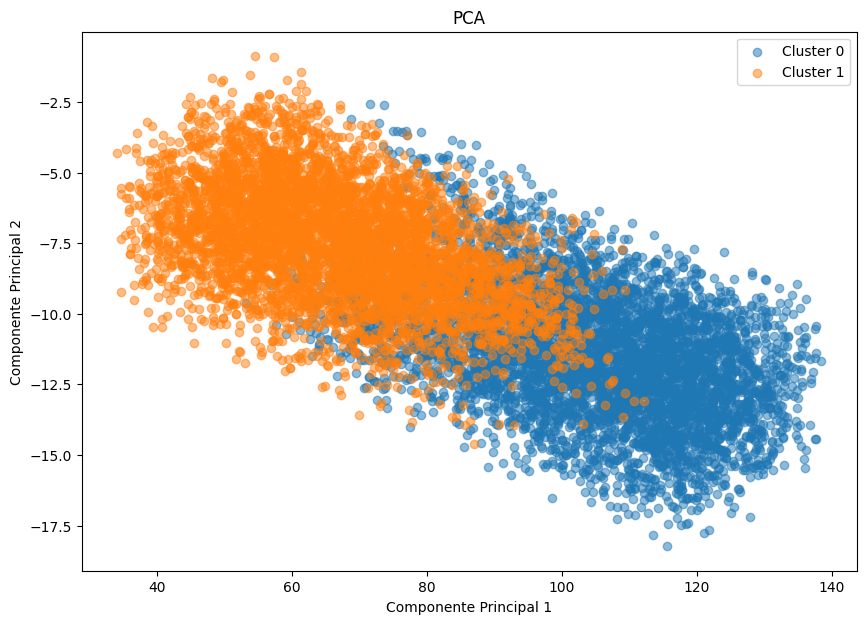

In [ ]:
# APLICAR PCA PARA VISUALIZACIÓN
n_components = 2
pca = PCA(n_components=2)
pca.fit(standardized_data)
data_pca = pca.transform(data_agglm.iloc[:, :-1]) # Aplicar PCA al DataFrame excluyendo la última, que es la que guarda las asignaciones a clústers.
data_pca = pd.DataFrame(data_pca, columns=["PC1","PC2"]) # Generamos
data_pca["n_cluster"] = agglm.labels_

plt.figure(figsize=(10, 7))
for cluster in data_pca['n_cluster'].unique():
    cluster_data = data_pca[data_pca['n_cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.legend()
plt.show()

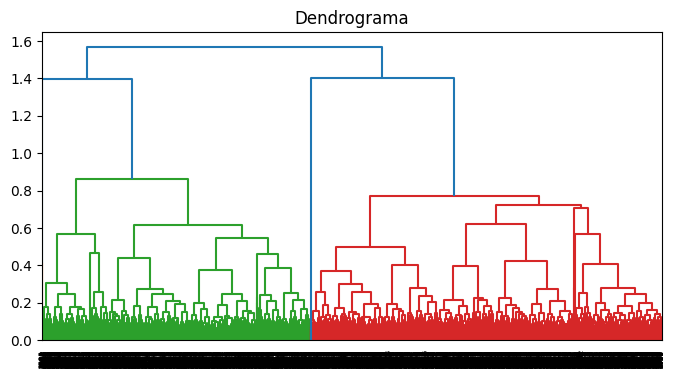

In [ ]:
# DENDROGRAMA
# Esta es la matriz de linkage. Contiene todos las filas del dataset, indicando para cada una de ellas el cluster al que pertenece para cada iteración del algoritmo.
Z = linkage(standardized_data, method=method)

plt.figure(figsize=(8, 4))
plt.title("Dendrograma")
dendrogram(Z)
plt.show()

In [ ]:
# INTERPRETACIÓN DE LOS CLUSTERS
# Dividimos cada cluster en dos DataFrames
data_agglm_0 = data_agglm[data_agglm["n_cluster"]==0]
data_agglm_1 = data_agglm[data_agglm["n_cluster"]==1]

In [ ]:
data_agglm_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,5171.0,4.925933,2.611929,1.0,3.0,5.0,7.0,9.0
Previous Scores,5171.0,83.008702,10.509428,48.0,76.0,84.0,92.0,99.0
Extracurricular Activities,5171.0,0.479404,0.499624,0.0,0.0,0.0,1.0,1.0
Sleep Hours,5171.0,6.593502,1.669590,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,5171.0,4.672404,2.884061,0.0,2.0,5.0,7.0,9.0
Performance Index,5171.0,68.939470,13.297649,24.0,60.0,70.0,79.0,100.0
n_cluster,5171.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_agglm_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,4829.0,5.064610,2.563196,1.0,3.0,5.0,7.0,9.0
Previous Scores,4829.0,54.922137,9.831858,40.0,47.0,54.0,62.0,86.0
Extracurricular Activities,4829.0,0.511286,0.499924,0.0,0.0,1.0,1.0,1.0
Sleep Hours,4829.0,6.463243,1.721178,4.0,5.0,6.0,8.0,9.0
Sample Question Papers Practiced,4829.0,4.487886,2.846550,0.0,2.0,5.0,7.0,9.0
Performance Index,4829.0,40.538828,12.567333,10.0,31.0,40.0,49.0,77.0
n_cluster,4829.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# **DBSCAN**

En vez de fijarnos en la cercanía o lejanía de los datos, podemos atender a otro tipo de criterios. **DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*) fija su atención en la densidad de puntos: agrupa puntos que están densamente conectados y marca como ruido los puntos que están en áreas de baja densidad. Precisamente por esta capacidad de detectar ruido DBSCAN es una excelente herramienta para la detección de outliers.

DBSCAN opera mediante dos parámetros, $ε$ o *eps*, que es la distancia máxima entre dos puntos para que se consideren como vecinos, y *MinPts*, el número mínimo de puntos necesarios para formar un clúster. El algoritmo localizando los ***core points***, todos aquellos puntos que tienen al menos *MinPts* puntos (incluyéndose a sí mismo) en su vecindad $ε$. En la imagen de abajo podemos ver punto que podríamos considerar *core point* con *MinPts* de siete o menos.

 <div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1OWo2jVs97PzTTmR8Xp3NPr202pNEHEZ0" width="400">

Una vez detectado un *core point*, DBSCAN genera un clúster y visita todos sus vecinos. Si se trata también *core points* los integra en el clúster.


El algoritmo DBSCAN funciona muy bien detectando estructuras complejas, aunque es muy sensible a cualquier modificación de los parámetros $ε$ y *MinPts*. Es fácil de comprender que un *MinPts* bajo permitiría ser menos restrictivo en cuanto a densidad $ε$. De la misma manera es aconsejable un valor alto cuando contamos con gran cantidad de outliers. Por otro lado $ε$ controla la vecindad local de los puntos. Cuando se elige demasiado pequeño, la mayoría de los datos no se agruparán en absoluto y se etiquetarán como "ruido". Cuando se elige demasiado grande, hace que los clústeres cercanos se fusionen en un solo clúster y, finalmente, todo el conjunto de datos se devuelva como un solo clúster.

Existe una alternativa más avanzada que es **HDBSCAN** (*Hierarchical Density-Based Spatial Clustering of Applications with Noise*) que añade mayor fexibilidad al permitir parámetros de desnidad dinámicos. Permite por ello clústers con diferentes criterios y ofrecer una jerarquía de clústeres basada en la densidad, lo que le da el nombre de "jerárquico". Si ya DBSCAN es computacionalmente intensivo, HDBSCAN lo es aún más.

In [ ]:
from sklearn.cluster import DBSCAN

# CLUSTERING DBSCAN
"""
Parámetros de DBSCAN():
  - eps: distancia máxima para ser considerado vecino de un core point.
  - min_samples: número mínimo de datos alrededor de un punto para que este sea considerado core point.
  - metric: métrica de distancia entre vectores, “euclidean”, “l1”, “l2”, “manhattan” o “cosine”.
"""
dbscan = DBSCAN(eps=1.5, min_samples=30, metric='euclidean')
dbscan.fit(standardized_data) # fit() devuelve un conjunto de métricas asociadas a la clusterización realizada
dbscan_data = pd.DataFrame(data).copy()
dbscan_data["n_cluster"] = dbscan.labels_ # agglm.labels_ guarda las asignaciones de clusters.
dbscan_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,n_cluster
0,7,99,1,9,1,91.0,0
1,4,82,0,4,2,65.0,1
2,8,51,1,7,2,45.0,0
3,5,52,1,5,2,36.0,0
4,7,75,0,8,5,66.0,1


Número de valores en el Cluster 0 4948
Número de valores en el Cluster 1 5052


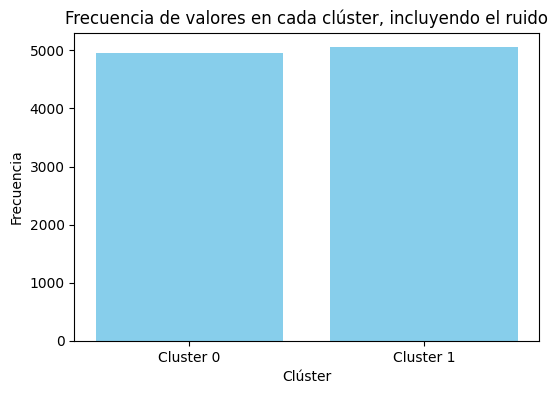

In [ ]:
# FRECUENCIA DE CASOS PARA CADA CLÚSTER INCLUIDO RUIDO
unique_labels = dbscan_data["n_cluster"].unique().tolist()
labels_frequency = {}
for label in unique_labels:
  if label<0:
    labels_frequency["Ruido"] = len(dbscan_data[dbscan_data["n_cluster"] == -1])
    print("Número de valores de ruido: ", len(dbscan_data[dbscan_data["n_cluster"] == -1]))
  else:
    labels_frequency[f"Cluster {label}"] = len(dbscan_data[dbscan_data["n_cluster"] == label])
    print(f"Número de valores en el Cluster {label}",len(dbscan_data[dbscan_data["n_cluster"] == label]))

# Generar un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels_frequency.keys(), labels_frequency.values(), color='skyblue')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores en cada clúster, incluyendo el ruido')
plt.show()

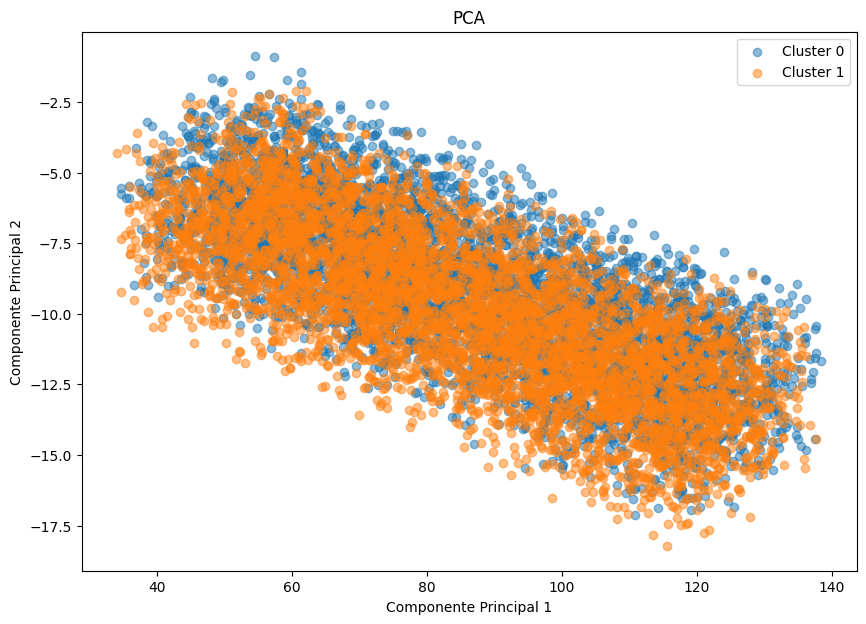

In [ ]:
# APLICAR PCA PARA VISUALIZACIÓN
n_components = 2
pca = PCA(n_components=2)
pca.fit(standardized_data)
data_pca = pca.transform(dbscan_data.iloc[:, :-1]) # Aplicar PCA al DataFrame excluyendo la última, que es la que guarda las asignaciones a clústers.
data_pca = pd.DataFrame(data_pca, columns=["PC1","PC2"]) # Generamos
data_pca["n_cluster"] = dbscan.labels_

plt.figure(figsize=(10, 7))
for cluster in data_pca['n_cluster'].unique():
    cluster_data = data_pca[data_pca['n_cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.legend()
plt.show()

# Dataset de prueba

Customer Personality Analysis

URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [ ]:
url='https://drive.google.com/file/d/11tpyADFejVR95saUW7574hxfdvE0I9tO/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url, sep="\t")